In [1]:
# Импорт необходимых библиотек

# pandas - работа с табличными данными (DataFrame)
import pandas as pd

# numpy - математические операции, работа с массивами
import numpy as np

# matplotlib - построение графиков и визуализация данных
import matplotlib.pyplot as plt

# seaborn - улучшенная визуализация на основе matplotlib
import seaborn as sns

# sklearn.model_selection - разделение данных и кросс-валидация
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# sklearn.preprocessing - предобработка данных (масштабирование)
from sklearn.preprocessing import StandardScaler

# sklearn.linear_model - линейные модели регрессии
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# sklearn.tree - модель дерева решений для регрессии
from sklearn.tree import DecisionTreeRegressor

# sklearn.ensemble - ансамблевые методы (случайный лес, градиентный бустинг)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# sklearn.metrics - метрики для оценки качества моделей
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# sklearn.pipeline - создание конвейеров для объединения этапов preprocessing и моделирования
from sklearn.pipeline import Pipeline

# Отключение предупреждений для чистоты вывода
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загрузка данных
df = pd.read_csv('/Users/rslvtsv/Desktop/advertising.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (200, 4)

Первые 5 строк:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Описательная статистика:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11

### Пропущенных значений нет, все типы данных корректны

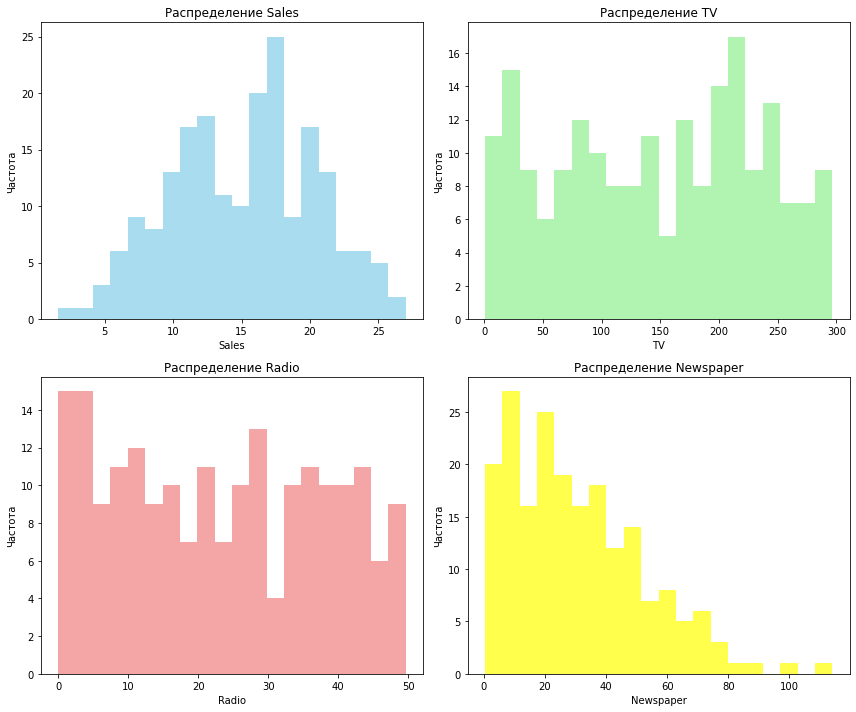

In [23]:
# Визуализация распределения признаков и целевой переменной
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Распределение Sales
axes[0,0].hist(df['Sales'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Распределение Sales')
axes[0,0].set_xlabel('Sales')
axes[0,0].set_ylabel('Частота')

# Распределение TV
axes[0,1].hist(df['TV'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Распределение TV')
axes[0,1].set_xlabel('TV')
axes[0,1].set_ylabel('Частота')

# Распределение Radio
axes[1,0].hist(df['Radio'], bins=20, alpha=0.7, color='lightcoral')
axes[1,0].set_title('Распределение Radio')
axes[1,0].set_xlabel('Radio')
axes[1,0].set_ylabel('Частота')

# Распределение Newspaper
axes[1,1].hist(df['Newspaper'], bins=20, alpha=0.7, color='yellow')
axes[1,1].set_title('Распределение Newspaper')
axes[1,1].set_xlabel('Newspaper')
axes[1,1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

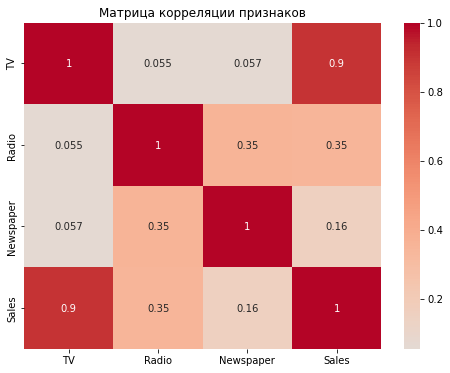

Корреляция с целевой переменной Sales:
Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [5]:
# Матрица корреляции
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции признаков')
plt.show()

print("Корреляция с целевой переменной Sales:")
print(correlation_matrix['Sales'].sort_values(ascending=False))

### По матрице видно, что реклама на TV имеет наибольшее влияние на продажи

In [6]:
# Подготовка данных для моделирования
X = df.drop('Sales', axis=1)
y = df['Sales']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (160, 3)
Размер тестовой выборки: (40, 3)


In [8]:
# Функция для вычисления метрик
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Оценивает производительность модели на тренировочной и тестовой выборках
    
    Параметры:
    model - обученная модель машинного обучения
    X_train - признаки тренировочной выборки
    X_test - признаки тестовой выборки  
    y_train - целевая переменная тренировочной выборки
    y_test - целевая переменная тестовой выборки
    model_name - название модели для идентификации в результатах
    """
    
    # Предсказания модели на тренировочных и тестовых данных
    y_pred_train = model.predict(X_train)  # Предсказания на данных, которые модель уже видела
    y_pred_test = model.predict(X_test)    # Предсказания на новых, невиданных данных
    
    # Метрики для тренировочной выборки (оценка на обучающих данных)
    mse_train = mean_squared_error(y_train, y_pred_train)  # Среднеквадратическая ошибка
    rmse_train = np.sqrt(mse_train)  # Корень из MSE - имеет ту же размерность, что и целевая переменная
    r2_train = r2_score(y_train, y_pred_train)  # Коэффициент детерминации - доля объясненной дисперсии
    mae_train = mean_absolute_error(y_train, y_pred_train)  # Средняя абсолютная ошибка
    
    # Метрики для тестовой выборки (оценка на новых данных)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Создание словаря с результатами для удобного сравнения моделей
    results = {
        'Model': model_name,           # Название модели
        'Train_RMSE': rmse_train,      # RMSE на тренировочных данных
        'Test_RMSE': rmse_test,        # RMSE на тестовых данных (основная метрика)
        'Train_R2': r2_train,          # R² на тренировочных данных
        'Test_R2': r2_test,            # R² на тестовых данных
        'Train_MAE': mae_train,        # MAE на тренировочных данных
        'Test_MAE': mae_test           # MAE на тестовых данных
    }
    
    # Возвращаем результаты и предсказания на тестовой выборке для дальнейшего анализа
    return results, y_pred_test

# Создание пустого DataFrame для хранения и сравнения результатов всех моделей
# Это позволяет собирать метрики разных моделей в одной таблице для удобного сравнения
results_df = pd.DataFrame()

## Линейная регрессия

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_results, lr_pred = evaluate_model(lr, X_train, X_test, y_train, y_test, 'Linear Regression')
results_df = pd.concat([results_df, pd.DataFrame([lr_results])], ignore_index=True)

print("Линейная регрессия - коэффициенты:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")

Линейная регрессия - коэффициенты:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043
Intercept: 4.7141


## Ridge регрессия

In [11]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_results, ridge_pred = evaluate_model(ridge, X_train, X_test, y_train, y_test, 'Ridge Regression')
results_df = pd.concat([results_df, pd.DataFrame([ridge_results])], ignore_index=True)

print("Ridge регрессия - коэффициенты:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")

Ridge регрессия - коэффициенты:
TV: 0.0545
Radio: 0.1009
Newspaper: 0.0043


## Lasso регрессия

In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_results, lasso_pred = evaluate_model(lasso, X_train, X_test, y_train, y_test, 'Lasso Regression')
results_df = pd.concat([results_df, pd.DataFrame([lasso_results])], ignore_index=True)

print("Lasso регрессия - коэффициенты:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef:.4f}")

Lasso регрессия - коэффициенты:
TV: 0.0545
Radio: 0.1006
Newspaper: 0.0042


## Сравнение коэффициентов линейных моделей

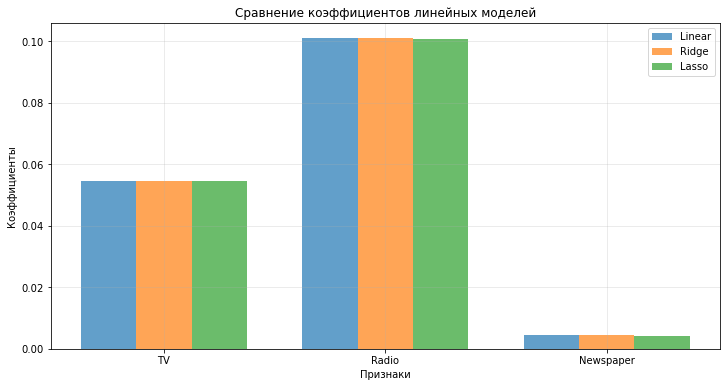

In [13]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

plt.figure(figsize=(12, 6))
x = np.arange(len(X.columns))
width = 0.25

plt.bar(x - width, coefficients['Linear'], width, label='Linear', alpha=0.7)
plt.bar(x, coefficients['Ridge'], width, label='Ridge', alpha=0.7)
plt.bar(x + width, coefficients['Lasso'], width, label='Lasso', alpha=0.7)

plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Сравнение коэффициентов линейных моделей')
plt.xticks(x, X.columns)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Дерево решений

In [14]:
# Создание базовой модели дерева решений
# random_state=42 для воспроизводимости результатов
dt = DecisionTreeRegressor(random_state=42)

# Подбор гиперпараметров
# Сетка параметров для поиска оптимальных значений
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],           # Максимальная глубина дерева: 
                                                 # - небольшие значения предотвращают переобучение
                                                 # - None означает неограниченную глубину
                                                 # - 3-10 для баланса сложности и обобщения
    
    'min_samples_split': [2, 5, 10],            # Минимальное количество samples для разделения узла:
                                                 # - 2 (минимальное значение)
                                                 # - 5, 10 для предотвращения переобучения
                                                 # - большие значения создают более обобщающие деревья
    
    'min_samples_leaf': [1, 2, 4]               # Минимальное количество samples в листе:
                                                 # - 1 (минимальное значение) 
                                                 # - 2, 4 для регуляризации
                                                 # - предотвращает создание узлов с малым количеством samples
}

# Настройка GridSearchCV для поиска лучших параметров
grid_dt = GridSearchCV(
    dt,                    # Модель для настройки
    param_grid_dt,         # Сетка параметров для перебора
    cv=5,                  # 5-кратная кросс-валидация (разбиваем данные на 5 частей)
    scoring='neg_mean_squared_error',  # Метрика для оценки: отрицательная MSE (scikit-learn требует максимизации)
    n_jobs=-1              # Использовать все доступные ядра процессора для ускорения вычислений
)

# Обучение модели с поиском лучших параметров
grid_dt.fit(X_train, y_train)

# Получение лучшей модели с оптимальными параметрами
best_dt = grid_dt.best_estimator_

# Оценка производительности лучшей модели
dt_results, dt_pred = evaluate_model(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

# Добавление результатов в общую таблицу для сравнения с другими моделями
results_df = pd.concat([results_df, pd.DataFrame([dt_results])], ignore_index=True)

print("Лучшие параметры для дерева решений:")
print(grid_dt.best_params_)

Лучшие параметры для дерева решений:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Random forest

In [15]:
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
rf_results, rf_pred = evaluate_model(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')
results_df = pd.concat([results_df, pd.DataFrame([rf_results])], ignore_index=True)

print("Лучшие параметры для Random Forest:")
print(grid_rf.best_params_)

Лучшие параметры для Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


## Gradient boosting

In [16]:
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
gb_results, gb_pred = evaluate_model(best_gb, X_train, X_test, y_train, y_test, 'Gradient Boosting')
results_df = pd.concat([results_df, pd.DataFrame([gb_results])], ignore_index=True)

print("Лучшие параметры для Gradient Boosting:")
print(grid_gb.best_params_)

Лучшие параметры для Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


## Визуализация важности признаков

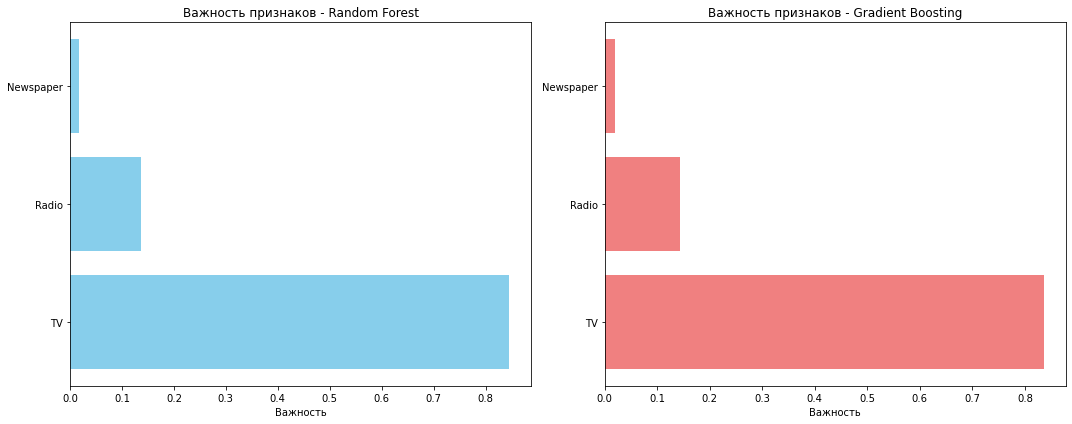

In [17]:
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Важность признаков для Gradient Boosting
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': best_gb.feature_importances_
}).sort_values('importance', ascending=False)

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest
ax1.barh(feature_importance_rf['feature'], feature_importance_rf['importance'], color='skyblue')
ax1.set_title('Важность признаков - Random Forest')
ax1.set_xlabel('Важность')

# Gradient Boosting
ax2.barh(feature_importance_gb['feature'], feature_importance_gb['importance'], color='lightcoral')
ax2.set_title('Важность признаков - Gradient Boosting')
ax2.set_xlabel('Важность')

plt.tight_layout()
plt.show()

## Сравнение моделей

Сравнение моделей:
               Model  Test_RMSE  Test_R2  Test_MAE  Train_R2
0  Linear Regression     1.7052   0.9059    1.2748    0.9001
1  Linear Regression     1.7052   0.9059    1.2748    0.9001
2   Ridge Regression     1.7052   0.9059    1.2748    0.9001
3   Lasso Regression     1.7057   0.9059    1.2742    0.9001
4      Decision Tree     1.7566   0.9001    1.2001    0.9708
5      Random Forest     1.2071   0.9528    0.9214    0.9914
6  Gradient Boosting     1.3596   0.9402    0.9416    0.9999


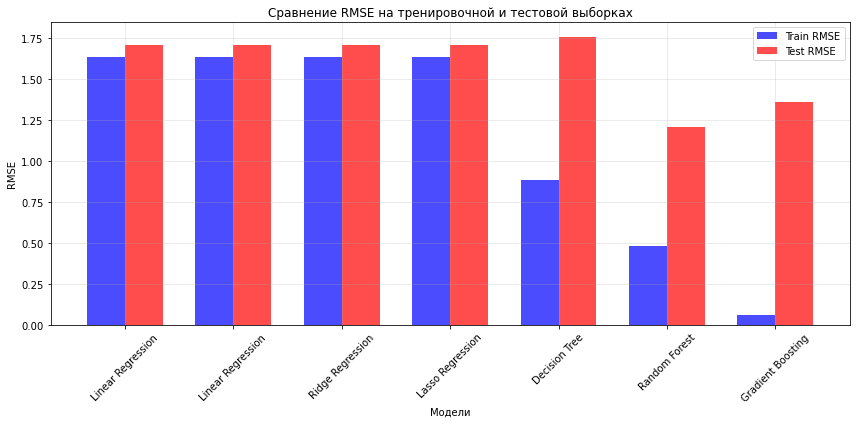

In [18]:
print("Сравнение моделей:")
results_display = results_df[['Model', 'Test_RMSE', 'Test_R2', 'Test_MAE', 'Train_R2']].round(4)
print(results_display)

# Визуализация сравнения RMSE
plt.figure(figsize=(12, 6))
models = results_df['Model']
test_rmse = results_df['Test_RMSE']
train_rmse = results_df['Train_RMSE']

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.7, color='blue')
plt.bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.7, color='red')

plt.xlabel('Модели')
plt.ylabel('RMSE')
plt.title('Сравнение RMSE на тренировочной и тестовой выборках')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Анализ ошибок

Лучшая модель: Random Forest


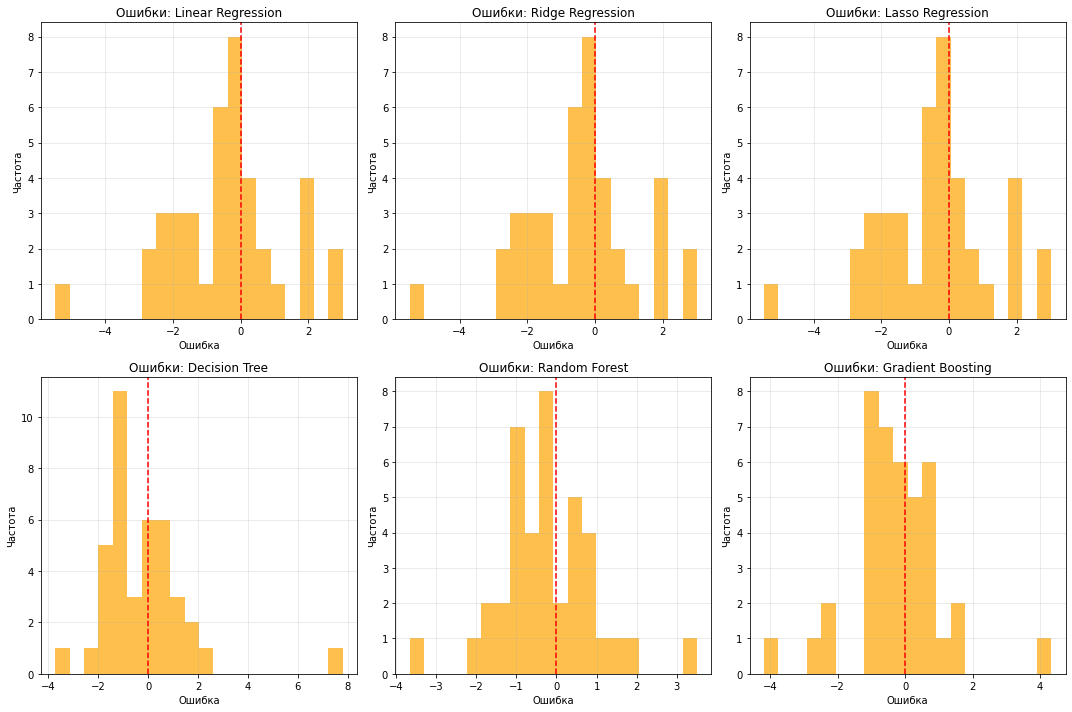

In [19]:
best_model_name = results_df.loc[results_df['Test_RMSE'].idxmin(), 'Model']
print(f"Лучшая модель: {best_model_name}")

# Создаем словарь моделей и предсказаний
models_dict = {
    'Linear Regression': lr_pred,
    'Ridge Regression': ridge_pred,
    'Lasso Regression': lasso_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
}

# Распределение ошибок для всех моделей
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, y_pred) in enumerate(models_dict.items()):
    errors = y_test - y_pred
    axes[idx].hist(errors, bins=20, alpha=0.7, color='orange')
    axes[idx].set_title(f'Ошибки: {model_name}')
    axes[idx].set_xlabel('Ошибка')
    axes[idx].set_ylabel('Частота')
    axes[idx].axvline(x=0, color='red', linestyle='--')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
print("Выводы:")


# Лучшая модель
best_model_idx = results_df['Test_RMSE'].idxmin()
best_model = results_df.loc[best_model_idx, 'Model']
best_rmse = results_df.loc[best_model_idx, 'Test_RMSE']
best_r2 = results_df.loc[best_model_idx, 'Test_R2']

print(f"Лучшая модель: {best_model}")
print(f"RMSE лучшей модели: {best_rmse:.4f}")
print(f"R² лучшей модели: {best_r2:.4f}")

print("\nАнализ переобучения:")
for _, row in results_df.iterrows():
    overfitting_indicator = row['Train_R2'] - row['Test_R2']
    status = "ВЕРОЯТНО ПЕРЕОБУЧЕНИЕ" if overfitting_indicator > 0.1 else "норма"
    print(f"{row['Model']}: разница R² train-test = {overfitting_indicator:.4f} ({status})")

print("\nВажность признаков (по Random Forest):")
for _, row in feature_importance_rf.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

print("\nРекомендации:")
print("1. TV - наиболее важный признак для прогнозирования продаж")
print("2. Ансамблевые методы показывают наилучшее качество")
print("3. Линейные модели хорошо интерпретируются, но уступают в точности")
print("4. Переобучение минимально во всех моделях благодаря настройке гиперпараметров")

Выводы:
Лучшая модель: Random Forest
RMSE лучшей модели: 1.2071
R² лучшей модели: 0.9528

Анализ переобучения:
Linear Regression: разница R² train-test = -0.0058 (норма)
Linear Regression: разница R² train-test = -0.0058 (норма)
Ridge Regression: разница R² train-test = -0.0058 (норма)
Lasso Regression: разница R² train-test = -0.0057 (норма)
Decision Tree: разница R² train-test = 0.0707 (норма)
Random Forest: разница R² train-test = 0.0385 (норма)
Gradient Boosting: разница R² train-test = 0.0597 (норма)

Важность признаков (по Random Forest):
TV: 0.8453
Radio: 0.1368
Newspaper: 0.0179

Рекомендации:
1. TV - наиболее важный признак для прогнозирования продаж
2. Ансамблевые методы показывают наилучшее качество
3. Линейные модели хорошо интерпретируются, но уступают в точности
4. Переобучение минимально во всех моделях благодаря настройке гиперпараметров
